![Traffic lights over urban intersection.](traffic.jpg)

**Challenges in Traffic Sign Management**

Traffic signs convey vital information to drivers. However, their effectiveness can be hindered by various factors, such as their visibility under different lighting conditions or the presence of obstructions.


**Training Traffic Sign Detection Models**

To address these challenges and enhance stop sign and traffic light detection capabilities, advanced technologies such as deep learning and computer vision have gained significant attention. In this project, you'll train an object detection model on 6 images of stop signs and 6 images of traffic lights, taken from various angles and lighting conditions. This training teaches the model to classify and locate these signs in images, improving its robustness and reliability for real-world applications.

(-0.5, 223.5, 223.5, -0.5)

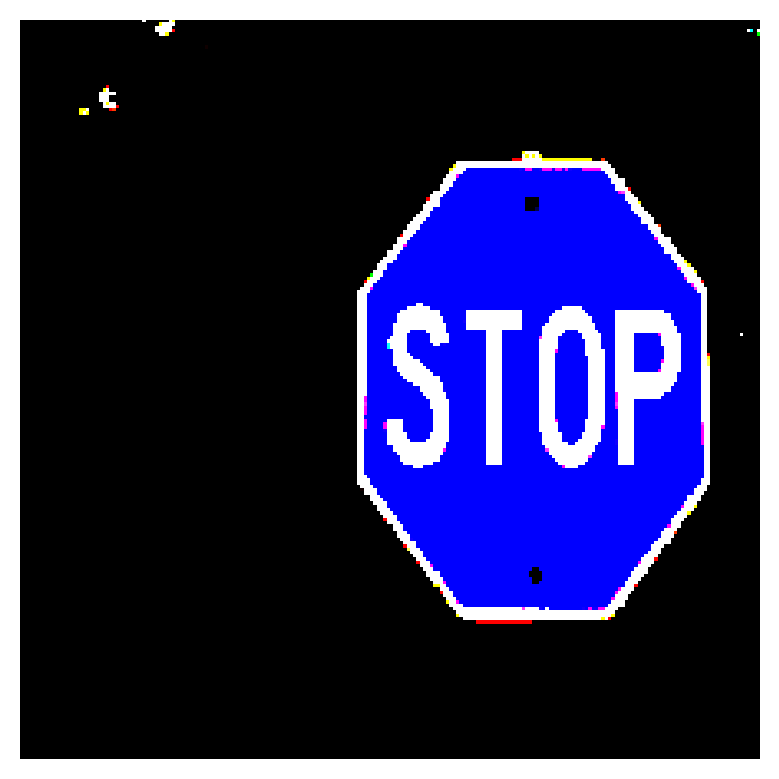

In [31]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load preprocessed images and the corresponding labels
image, labels = np.load('batch.npy',allow_pickle=True).tolist()

# hyperparameters
input_size = image.shape[1] # dimension of input image
num_classes = labels['classifier_head'].shape[1] # number of classes
DROPOUT_FACTOR = 0.2 # dropout probability

# visualize one example preprocessed image
plt.imshow(image[2])
plt.axis("off")

In [32]:
# Define the object detection model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_size, num_classes, dropout_factor):
    inputs = Input(shape=(input_size, input_size, 3))
    
    # Convolutional layers
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_factor)(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_factor)(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_factor)(x)
    
    # Flatten and fully connected layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_factor)(x)
    
    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    return model

model = create_model(input_size, num_classes, DROPOUT_FACTOR)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                      

In [33]:
# Import necessary libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Assuming X and y are your data and labels
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(image, labels['classifier_head'], test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Calculate training accuracy
train_accuracy = history.history['accuracy'][-1]
accuracy = train_accuracy

Epoch 1/20
1/1 [==============================] - 1s 838ms/step - loss: 12.2130 - accuracy: 0.6667 - val_loss: 1882.6698 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 297ms/step - loss: 3998.1902 - accuracy: 0.4444 - val_loss: 380.4416 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 297ms/step - loss: 822.7932 - accuracy: 0.4444 - val_loss: 302.5822 - val_accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 0s 271ms/step - loss: 310.6441 - accuracy: 0.5556 - val_loss: 228.1290 - val_accuracy: 0.3333
Epoch 5/20
1/1 [==============================] - 0s 289ms/step - loss: 311.6324 - accuracy: 0.5556 - val_loss: 113.9362 - val_accuracy: 0.3333
Epoch 6/20
1/1 [==============================] - 0s 290ms/step - loss: 146.1648 - accuracy: 0.5556 - val_loss: 43.3720 - val_accuracy: 0.3333
Epoch 7/20
1/1 [==============================] - 0s 290ms/step - loss: 66.2005 - accuracy: 0.5556 - val_loss: 9.8491 - val_accuracy: 0.